In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
#pandas 설정

# 최대 줄 수 설정
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)

In [3]:
dataset = pd.read_csv("../Dataset/train.csv")
dataset.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [4]:
dataset.shape

(15000, 70)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

- nerdiness : 괴짜 / 0 or 1

In [6]:
dataset.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,14928.000000,14941.000000,14933.000000,14960.000000,14964.000000,14955.000000,14967.000000,14963.000000,14937.000000,14947.000000,14955.000000,14961.000000,14962.000000,14950.000000,14939.000000,14956.000000,14932.000000,15000.000000,15000.000000,1.500000e+04,14947.000000,14934.000000,14921.000000,14936.000000,14930.000000,14938.000000,14936.000000,14935.000000,14936.000000,14920.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,14833.000000,15000.000000,14981.000000,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,4.110598,3.123419,3.798835,3.701404,3.723603,3.021130,3.433621,3.941121,3.903461,3.385763,3.674022,2.968384,2.412846,3.835452,4.296740,3.151444,4.161465,767.137733,387.965667,2.787959e+03,2.623135,3.037565,3.466122,3.275308,3.876088,3.682287,3.529191,3.039103,3.161422,2.177413,0.958667,0.921667,0.529133,0.968400,0.947333,0.101533,0.236000,0.436600,0.067200,0.956067,0.280067,0.210267,0.761133,0.90620,0.959867,0.980600,2.314232,2.163867,1.703024,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,1.047617,1.569761,1.233672,1.321331,1.160248,1.514791,1.399485,1.136492,1.322643,1.546368,1.171751,1.609673,1.375515,1.360530,0.919564,1.376888,1.030046,13835.948037,8513.031610,1.785955e+05,1.150815,1.059533,0.999300,1.175920,0.911841,1.108197,1.015622,1.140791,1.067203,1.034280,0.199067,0.268704,0.499167,0.174939,0.223375,0.302044,0.424636,0.495981,0.250376,0.204954,0.449047,0.407512,0.426405,0.29156,0.196278,0.137931,0.921192,0.728274,0.553286,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000,4.000000,82.000000,1.260000e+02,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.00

<AxesSubplot:>

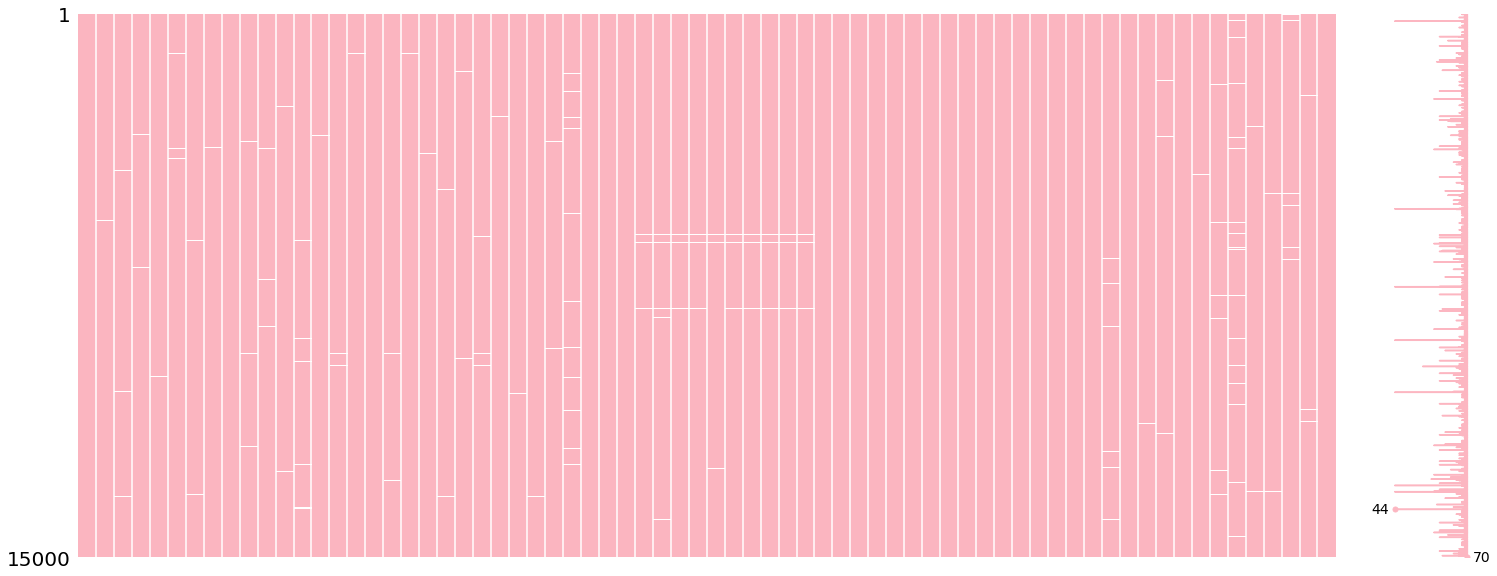

In [7]:
msno.matrix(dataset.iloc[:, :], color = (0.988, 0.713, 0.756))

In [8]:
dataset.isna().sum()

index             0
Q1               41
Q2               69
Q3               50
Q4               71
Q5               38
Q6               48
Q7               76
Q8               48
Q9               56
Q10              72
Q11              59
Q12              67
Q13              40
Q14              36
Q15              45
Q16              33
Q17              37
Q18              63
Q19              53
Q20              45
Q21              39
Q22              38
Q23              50
Q24              61
Q25              44
Q26              68
country         190
introelapse       0
testelapse        0
surveyelapse      0
TIPI1            53
TIPI2            66
TIPI3            79
TIPI4            64
TIPI5            70
TIPI6            62
TIPI7            64
TIPI8            65
TIPI9            64
TIPI10           80
VCL1              0
VCL2              0
VCL3              0
VCL4              0
VCL5              0
VCL6              0
VCL7              0
VCL8              0
VCL9              0


In [9]:
for col  in dataset:
    print("col name : ", col)
    print(dataset[col].value_counts())
    print('Nan', dataset[col].isna().sum())
    print('==='*10)

col name :  index
0        1
10004    1
9992     1
9993     1
9994     1
        ..
5004     1
5005     1
5006     1
5007     1
14999    1
Name: index, Length: 15000, dtype: int64
Nan 0
col name :  Q1
5.0    5939
4.0    4924
3.0    2444
2.0    1055
1.0     597
Name: Q1, dtype: int64
Nan 41
col name :  Q2
5.0    7236
4.0    4129
3.0    1688
2.0    1067
1.0     811
Name: Q2, dtype: int64
Nan 69
col name :  Q3
5.0    7626
4.0    4788
3.0    1256
2.0     801
1.0     479
Name: Q3, dtype: int64
Nan 50
col name :  Q4
5.0    5512
4.0    4313
3.0    2564
2.0    1619
1.0     921
Name: Q4, dtype: int64
Nan 71
col name :  Q5
5.0    5619
4.0    4833
3.0    2153
2.0    1458
1.0     899
Name: Q5, dtype: int64
Nan 38
col name :  Q6
4.0    4846
5.0    4336
3.0    3238
2.0    1659
1.0     873
Name: Q6, dtype: int64
Nan 48
col name :  Q7
5.0    7584
4.0    4385
3.0    1581
2.0     854
1.0     520
Name: Q7, dtype: int64
Nan 76
col name :  Q8
5.0    6605
4.0    3888
3.0    1823
1.0    1319
2.0    1317
Name

In [10]:
print("age : ", dataset['age'].unique())

age :  [   20    49    43    17    18    26    40    34    29    24    13    14
    16    19    15    23    32    22    25    27    33    41    21    50
    64    44    31    35    67    48    38    46    58    59    52    42
    37    55    36    45    28    47    30    39    54    53    69    57
    72    51    56    65    60    61   100    66    73    70    68   123
    62    71    78    76    63   545    74    88   722 38822    75    77
    99    81   336    80]


In [11]:
def check_histogram(columns, row, col) :
    plt.style.use("ggplot") 
    plt.figure(figsize=(17,10))
    plt.suptitle("Data Histogram", fontsize=20)
    
    for i in range(len(columns)):
        plt.subplot(row,col,i+1)
        plt.title(columns[i], fontsize=15)
        # 값의 종류가 20개가 넘을 경우 blue 
        if len(dataset[columns[i]].unique()) > 20:  
            plt.hist(dataset[columns[i]], color='b', alpha=0.7)
        # 아닐 경우 orange
        else: 
            temp = dataset[columns[i]].value_counts()
            plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
            plt.xticks(temp.keys())

    plt.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()

- Q1 ~ Q26

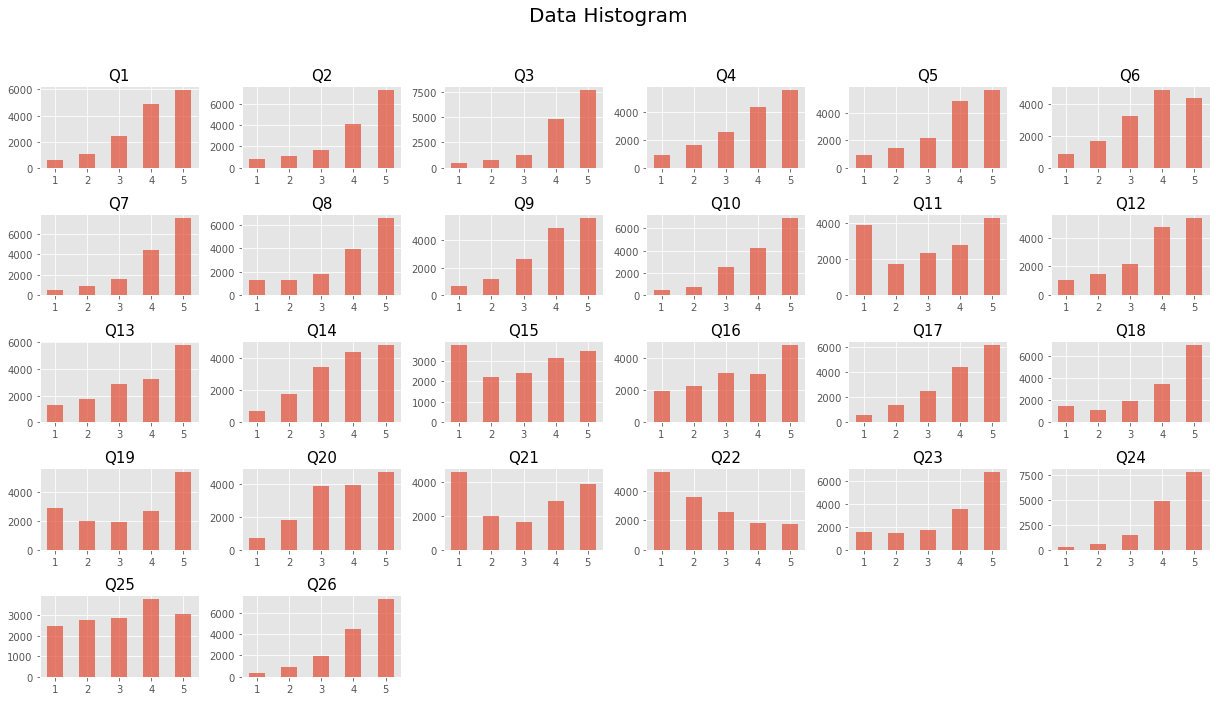

In [12]:
check_histogram(dataset.iloc[:, 1:27].columns, 5, 6)

- TIPI1~10

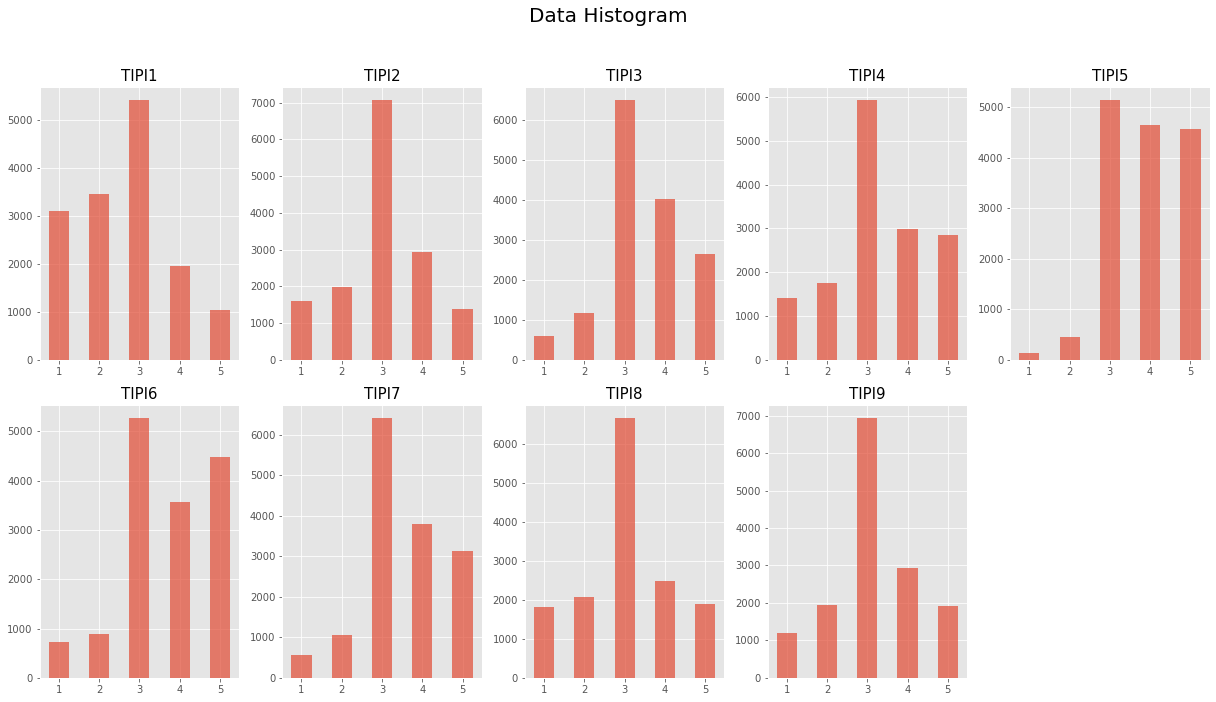

In [13]:
check_histogram(dataset.iloc[:, 31:40].columns, 2, 5)

- VCL1 ~ 16

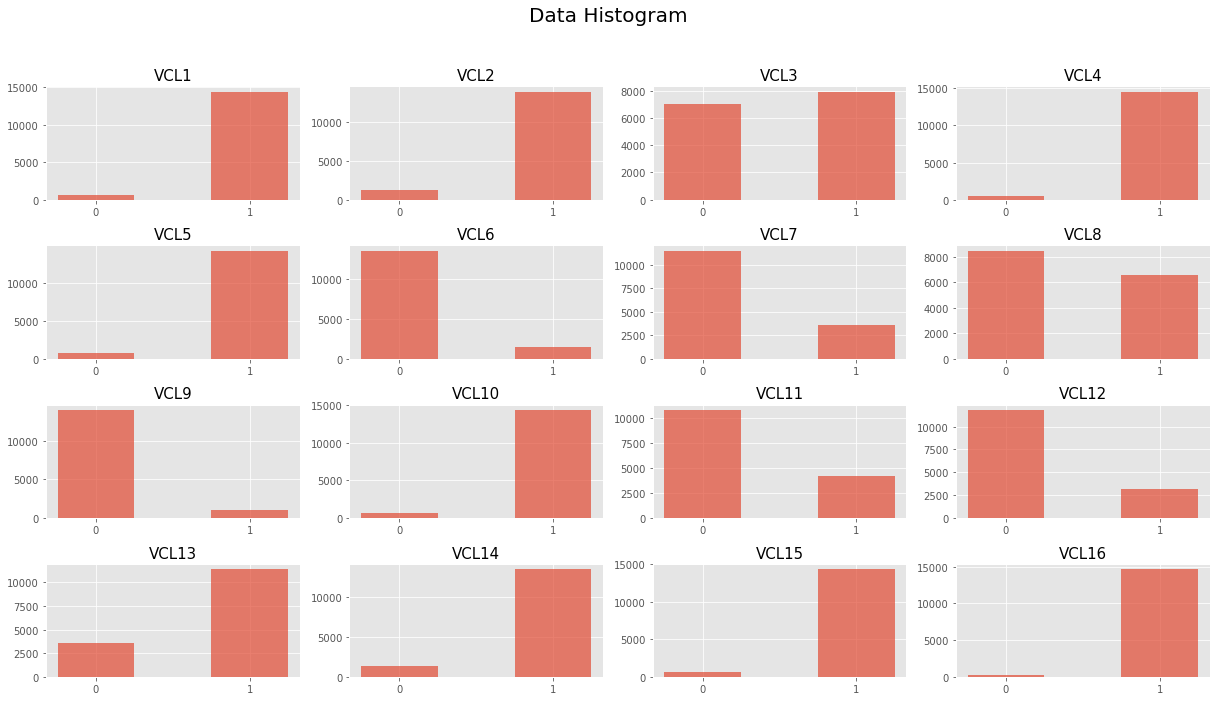

In [14]:
check_histogram(dataset.iloc[:, 41:57].columns, 4, 4)

===============================================================================================================
- 실험노트

<AxesSubplot:>

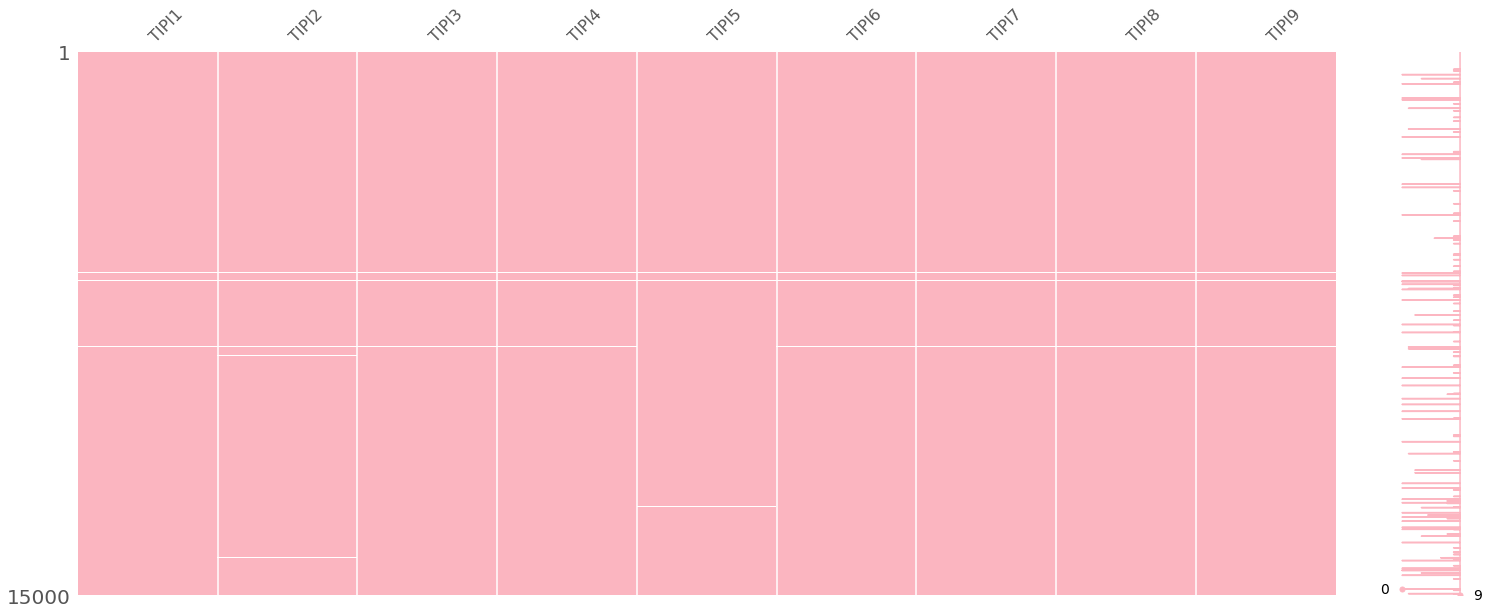

In [15]:
msno.matrix(dataset.iloc[:, 31:40], color = (0.988, 0.713, 0.756))

1. 응답을 일관성 있게 안한 사람이 궁금해요!

In [19]:
TIPI = ['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9']

In [31]:
tipi_dataset = dataset[TIPI]
tipi_dataset['cnt_null'] = tipi_dataset.isna().sum(1)
tipi_dataset

C:\Users\yeada\AppData\Local\Temp/ipykernel_22172/2781884044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tipi_dataset['cnt_null'] = tipi_dataset.isna().sum(1)


,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,cnt_null
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,0
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,0
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,0
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,0
4,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
14995,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,0
14996,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,0
14997,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,0
14998,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,0


In [32]:
temp = dataset['nerdiness']
tipi_dataset = pd.concat([tipi_dataset, temp], axis =1)
tipi_dataset

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,cnt_null,nerdiness
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,0,1
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,0,1
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,0,1
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,0,1
4,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,0,0
14996,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,0,1
14997,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,0,1
14998,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,0,0


In [58]:
null_data = tipi_dataset[tipi_dataset['cnt_null'] >= 1]
null_data[null_data['nerdiness'] == 1]

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,cnt_null,nerdiness
485,2.0,3.0,NaN,3.0,4.0,4.0,2.0,3.0,3.0,1,1
842,3.0,NaN,3.0,3.0,3.0,4.0,4.0,3.0,5.0,1,1
1437,2.0,2.0,NaN,3.0,3.0,4.0,3.0,1.0,3.0,1,1
1812,2.0,4.0,NaN,3.0,5.0,5.0,2.0,3.0,4.0,1,1
2785,5.0,1.0,1.0,5.0,5.0,3.0,NaN,2.0,5.0,1,1
2943,4.0,3.0,NaN,5.0,4.0,2.0,4.0,3.0,1.0,1,1
4459,3.0,4.0,3.0,2.0,NaN,5.0,3.0,3.0,3.0,1,1
4672,2.0,4.0,3.0,NaN,5.0,5.0,3.0,3.0,3.0,1,1
5164,1.0,3.0,3.0,2.0,NaN,4.0,2.0,3.0,1.0,1,1
5198,2.0,2.0,NaN,3.0,3.0,4.0,3.0,1.0,3.0,1,1


In [62]:
null_data = tipi_dataset[tipi_dataset['cnt_null'] >= 1]
null_data[null_data['nerdiness'] == 0]

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,cnt_null,nerdiness
529,2.0,2.0,4.0,2.0,5.0,3.0,NaN,2.0,5.0,1,0
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
742,NaN,5.0,NaN,NaN,5.0,2.0,NaN,NaN,NaN,6,0
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
1561,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0
1630,3.0,3.0,3.0,3.0,NaN,5.0,3.0,4.0,4.0,1,0
1914,5.0,NaN,4.0,5.0,4.0,1.0,3.0,5.0,3.0,1,0
2133,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0


In [61]:
null0_data = tipi_dataset[tipi_dataset['cnt_null'] == 0]
null0_data[null0_data['nerdiness'] == 1]

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,cnt_null,nerdiness
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,0,1
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,0,1
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,0,1
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,0,1
5,5.0,3.0,3.0,3.0,5.0,2.0,4.0,5.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14992,2.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,4.0,0,1
14994,3.0,3.0,3.0,3.0,4.0,3.0,5.0,5.0,3.0,0,1
14996,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,0,1
14997,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,0,1


TIPI 응답을 일관성 있게 안한거는 별 의미가 없는 거 같아요
just 체크가 안된거 뿐........이구나...